In [176]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

In [177]:
df = pd.read_csv("./imports-85.data")

In [178]:
df.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [179]:
df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [180]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

# Data Cleaning

In [182]:
columns_to_drop = ['normalized-losses', 'bore','compression-ratio','peak-rpm','wheel-base','curb-weight']
df = df.drop(columns_to_drop,axis=1)

In [183]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,stroke,horsepower,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,mpfi,2.68,111,21,27,16500
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,ohcv,six,152,mpfi,3.47,154,19,26,16500
2,2,audi,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,ohc,four,109,mpfi,3.40,102,24,30,13950
3,2,audi,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,ohc,five,136,mpfi,3.40,115,18,22,17450
4,2,audi,gas,std,two,sedan,fwd,front,177.3,66.3,53.1,ohc,five,136,mpfi,3.40,110,19,25,15250


In [184]:
df_clean = df.replace('?', np.nan)

In [185]:
df_clean = df_clean.fillna(value = df_clean.median())

C:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [186]:
df_clean = df_clean.dropna()

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         204 non-null    int64  
 1   make              204 non-null    object 
 2   fuel-type         204 non-null    object 
 3   aspiration        204 non-null    object 
 4   num-of-doors      204 non-null    object 
 5   body-style        204 non-null    object 
 6   drive-wheels      204 non-null    object 
 7   engine-location   204 non-null    object 
 8   length            204 non-null    float64
 9   width             204 non-null    float64
 10  height            204 non-null    float64
 11  engine-type       204 non-null    object 
 12  num-of-cylinders  204 non-null    object 
 13  engine-size       204 non-null    int64  
 14  fuel-system       204 non-null    object 
 15  stroke            204 non-null    object 
 16  horsepower        204 non-null    object 
 1

In [188]:
df_clean['price'] = df_clean['price'].astype('float64')

# Visualisation

In [189]:
import seaborn as sns

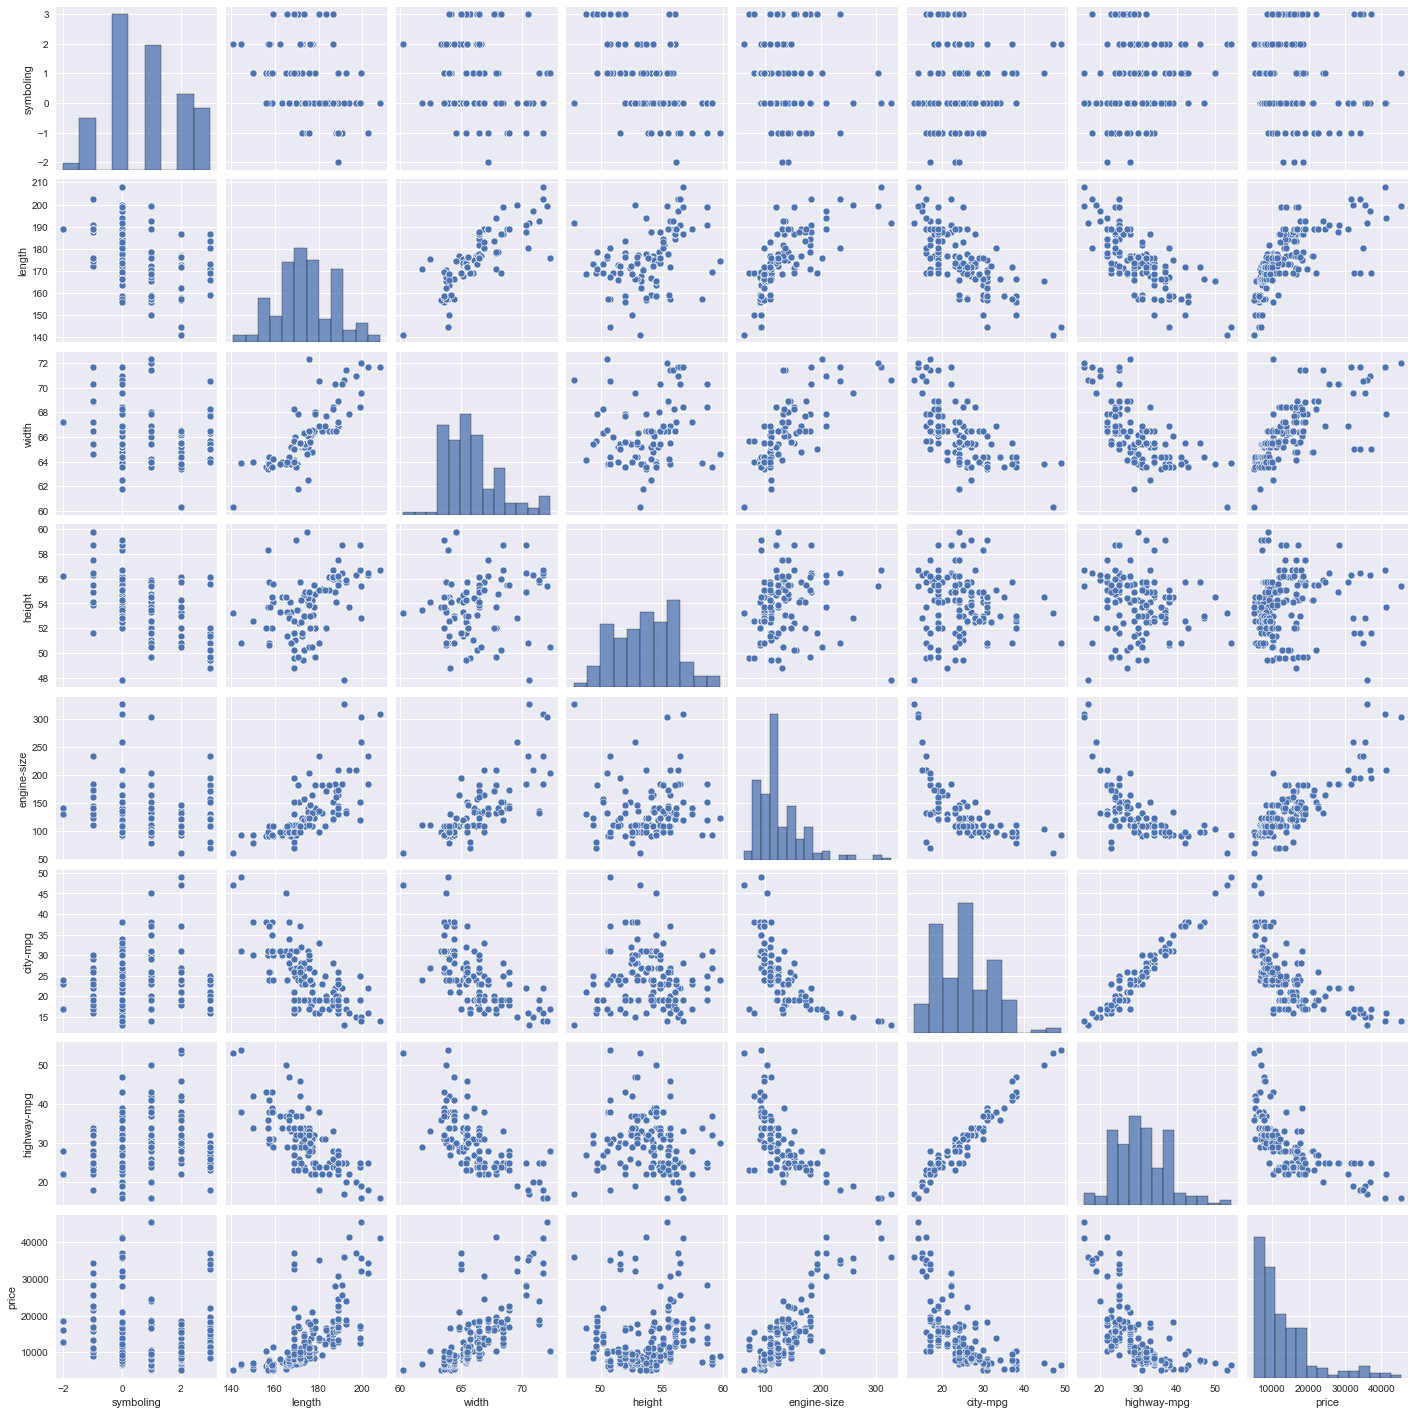

In [190]:
sns.pairplot(df_clean)
plt.show()

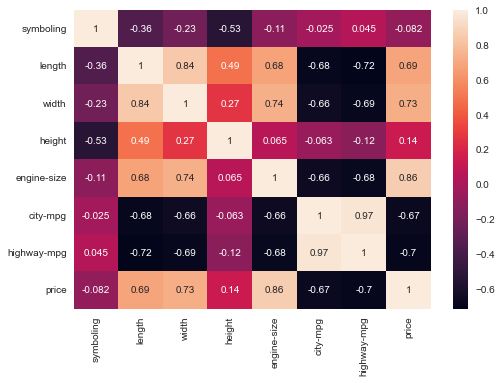

In [191]:
sns.heatmap(df_clean.corr(),annot=True)
plt.show()

# Encoding

In [192]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'stroke', 'horsepower']
for i in columns_to_encode:
  df_clean[i] = le.fit_transform(df_clean[i].astype(str))

In [193]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 203
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         202 non-null    int64  
 1   make              202 non-null    int32  
 2   fuel-type         202 non-null    int32  
 3   aspiration        202 non-null    int32  
 4   num-of-doors      202 non-null    int32  
 5   body-style        202 non-null    int32  
 6   drive-wheels      202 non-null    int32  
 7   engine-location   202 non-null    int32  
 8   length            202 non-null    float64
 9   width             202 non-null    float64
 10  height            202 non-null    float64
 11  engine-type       202 non-null    int32  
 12  num-of-cylinders  202 non-null    int32  
 13  engine-size       202 non-null    int64  
 14  fuel-system       202 non-null    int32  
 15  stroke            202 non-null    int32  
 16  horsepower        202 non-null    int32  
 1

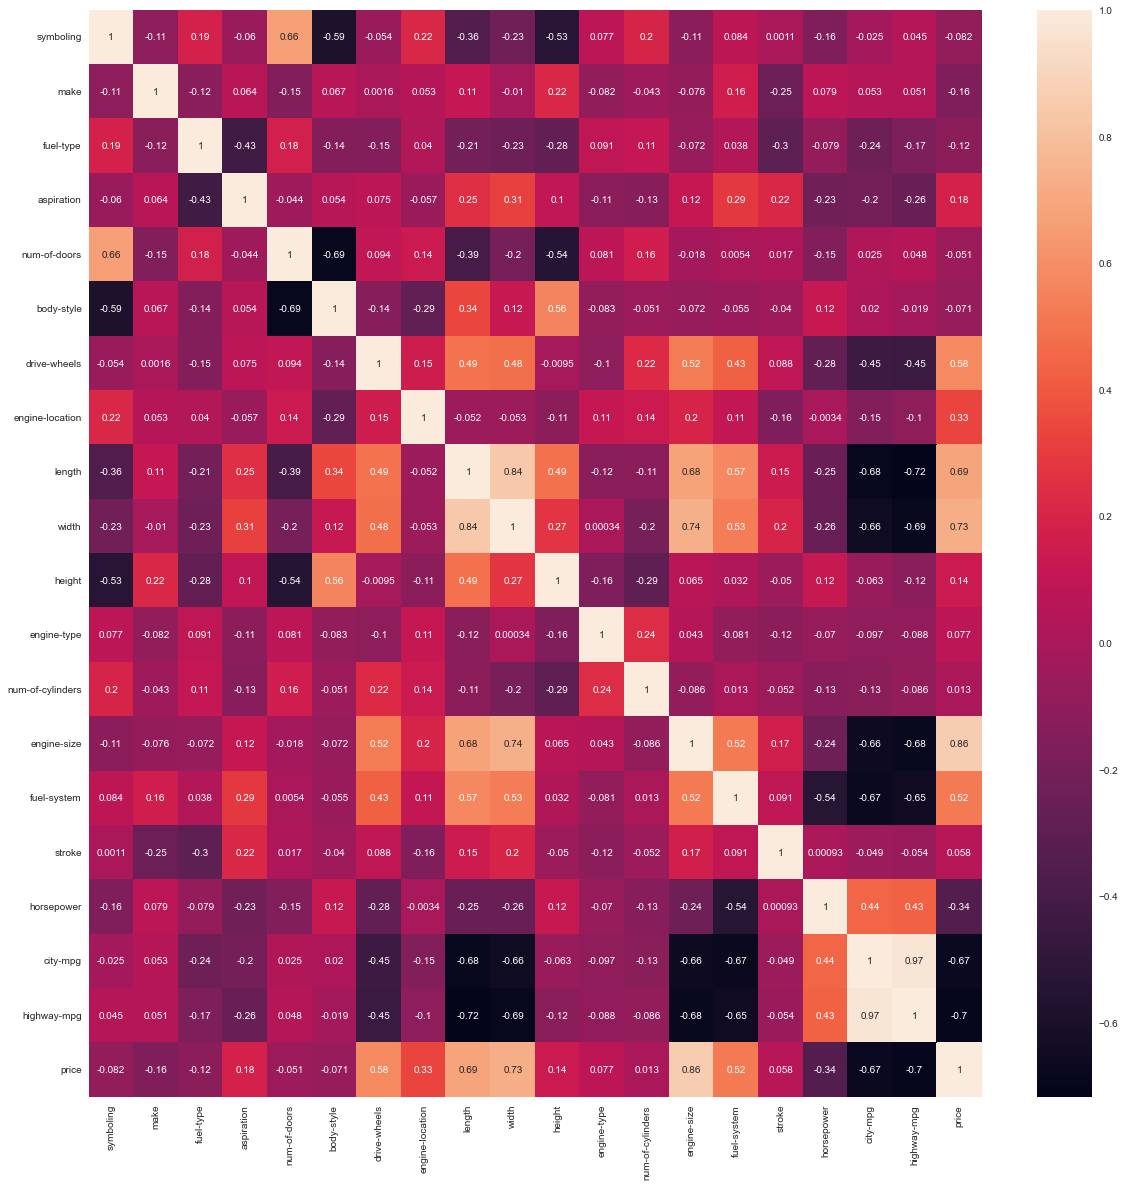

In [194]:
plt.figure(figsize=(20,20))
sns.heatmap(df_clean.corr(),annot=True)
plt.show()

In [195]:
df_clean.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'length', 'width',
       'height', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'stroke', 'horsepower', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [196]:
col_to_drop = ['symboling', 'num-of-doors', 'body-style', 'engine-type', 'num-of-cylinders', 'stroke']
df_clean = df_clean.drop(col_to_drop, axis = 1)

In [197]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 203
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             202 non-null    int32  
 1   fuel-type        202 non-null    int32  
 2   aspiration       202 non-null    int32  
 3   drive-wheels     202 non-null    int32  
 4   engine-location  202 non-null    int32  
 5   length           202 non-null    float64
 6   width            202 non-null    float64
 7   height           202 non-null    float64
 8   engine-size      202 non-null    int64  
 9   fuel-system      202 non-null    int32  
 10  horsepower       202 non-null    int32  
 11  city-mpg         202 non-null    int64  
 12  highway-mpg      202 non-null    int64  
 13  price            202 non-null    float64
dtypes: float64(4), int32(7), int64(3)
memory usage: 26.2 KB


In [198]:
X,Y = df_clean.values[:,:-1],df_clean.values[:,-1]

In [199]:
print(X.shape, Y.shape)

(202, 13) (202,)


# Data Normalization

In [200]:
u = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-u)/std

In [201]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X)

[[ 1.         -1.98265203  0.32221908 ... -1.46925631 -0.64279561
  -0.54119201]
 [ 1.         -1.98265203  0.32221908 ... -0.63760179 -0.9493947
  -0.68675896]
 [ 1.         -1.82168108  0.32221908 ... -1.63558721 -0.18289698
  -0.10449113]
 ...
 [ 1.          1.3977378   0.32221908 ... -1.02570723 -1.10269424
  -1.12345984]
 [ 1.          1.3977378  -3.10347852 ... -1.58014358  0.12370211
  -0.54119201]
 [ 1.          1.3977378   0.32221908 ... -1.35836904 -0.9493947
  -0.83232592]]


In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=7)

In [240]:
def r2_score(y,y_):
  num = np.sum((y-y_)**2)
  denom = np.sum((y-y.mean())**2)
  score = 1-(num/denom)
  return score*100
  
def train_val_data(X,Y):
  train_X,val_X,train_Y,val_Y = train_test_split(X, Y, test_size=0.05,shuffle=True)
  return train_X,val_X,train_Y,val_Y

In [241]:
def hypothesis(X,theta):
  return np.dot(X,theta)

def error(X,y,theta):
  e = 0.0
  m = X.shape[0]
  y_ = hypothesis(X,theta)
  e = (np.sum((y-y_)**2))
  return e/m

def gradient(X,y,theta):
  y_ = hypothesis(X,theta)
  grad = np.dot(X.T,(y_-y))
  m = X.shape[0]
  return grad/m
  
def gradient_Descent(X,y,learning_rate = 0.1,max_iters = 300):
  n = X.shape[1]
  theta = np.zeros((n,))
  error_list = []
  validation_score = []
  for i in range(max_iters):
    train_X,val_X,train_Y,val_Y = train_val_data(X,y)

    e = error(train_X,train_Y,theta)
    error_list.append(e)

    grad = gradient(train_X,train_Y,theta)
    theta = theta - learning_rate*grad
    y_ = hypothesis(val_X,theta)
    validation_score.append(r2_score(val_Y,y_))
  return theta,error_list,validation_score

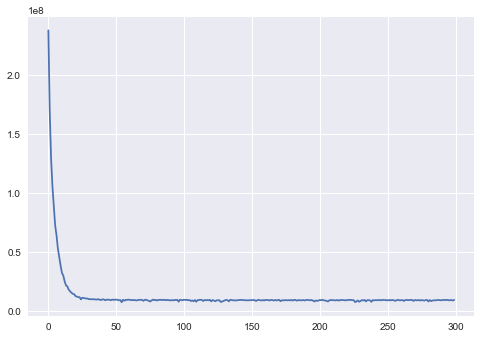

In [242]:
theta,error_list,validation_score = gradient_Descent(X_train,y_train)
plt.plot(error_list)
plt.show()

In [243]:
validation_score = pd.DataFrame(np.array(validation_score),columns=["Validation Score"])
validation_score.describe()

,Validation Score
count,300.000000
mean,59.786976
std,66.434462
min,-698.709417
25%,60.217567
50%,77.071055
75%,89.262251
max,99.015805


In [244]:
y_ = hypothesis(X_test,theta)
print("Overall R2-Score: ", r2_score(y_test, y_))

Overall R2-Score:  89.87250823993652


# Lasso

In [208]:
def hypothesis_l(X,theta):
  return np.dot(X,theta)

def error_l(X,y,theta, lamb):
  e = 0.0
  m = X.shape[0]
  y_ = hypothesis_l(X,theta)
  e = np.sum((y-y_)**2) + lamb*np.sum(np.abs(theta))
  return e/m

def gradient_l(X,y,theta,lamb):
  y_ = hypothesis_l(X,theta)
  grad = np.dot(X.T,(y_-y)) + lamb*(2*np.sinc(theta)-1)
  m = X.shape[0]
  return grad/m

def gradient_Descent_l(X,y,lamb,learning_rate = 0.1,max_iters = 300):
  n = X.shape[1]
  theta = np.zeros((n,))
  error_list = []
  validation_score = []
  for i in range(max_iters):
    train_X,val_X,train_Y,val_Y = train_val_data(X,y)

    e = error_l(train_X,train_Y,theta,lamb)
    error_list.append(e)

    grad = gradient_l(train_X,train_Y,theta,lamb)
    theta = theta - learning_rate*grad
    
    y_ = hypothesis_l(val_X,theta)
    validation_score.append(r2_score(val_Y,y_))
  return theta,error_list,validation_score

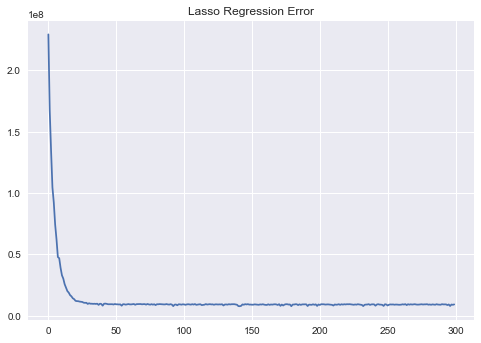

In [209]:
theta,error_list,validation_score = gradient_Descent_l(X_train,y_train,lamb=5)
plt.plot(error_list)
plt.title("Lasso Regression Error")
plt.show()

In [219]:
validation_score = pd.DataFrame(np.array(validation_score),columns=["Validation Lasso Regression"])
validation_score.describe()

,Validation Lasso Regression
count,300.000000
mean,60.209864
std,65.849772
min,-535.462814
25%,61.565858
50%,78.207575
75%,87.115036
max,97.205835


In [211]:
y_ = hypothesis_r(X_test,theta)
print("Overall R2-Score: ",r2_score(y_test,y_))

Overall R2-Score:  89.77578347361292


# Ridge

In [212]:
def hypothesis_r(X,theta):
  return np.dot(X,theta)

def error_r(X,y,theta, lamb):
  e = 0.0
  m = X.shape[0]
  y_ = hypothesis_r(X,theta)
  e = np.sum((y-y_)**2) + lamb*np.sum(np.square(theta))
  return e/m

def gradient_r(X,y,theta,lamb):
  y_ = hypothesis_r(X,theta)
  grad = np.dot(X.T,(y_-y)) + lamb*theta
  m = X.shape[0]
  return grad/m

def gradient_Descent_r(X,y,lamb,learning_rate = 0.1,max_iters = 300):
  n = X.shape[1]
  theta = np.zeros((n,))
  error_list = []
  validation_score = []
  for i in range(max_iters):
    train_X,val_X,train_Y,val_Y = train_val_data(X,y)

    e = error_r(train_X,train_Y,theta,lamb)
    error_list.append(e)

    grad = gradient_r(train_X,train_Y,theta,lamb)
    theta = theta - learning_rate*grad

    y_ = hypothesis_r(val_X,theta)
    validation_score.append(r2_score(val_Y,y_))
  return theta,error_list,validation_score

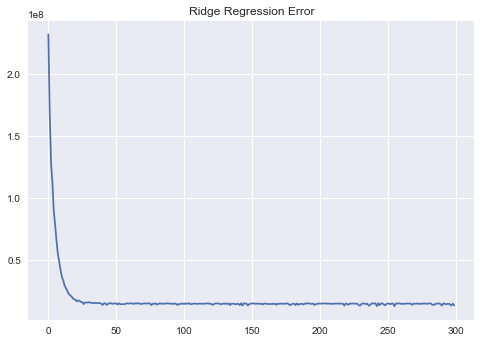

In [245]:
theta,error_list,validation_score = gradient_Descent_r(X_train,y_train,lamb=5)
plt.plot(error_list)
plt.title("Ridge Regression Error")
plt.show()

In [246]:
validation_score = pd.DataFrame(np.array(validation_score),columns=["Validation Ridge Regression"])
validation_score.describe()

,Validation Ridge Regression
count,300.000000
mean,68.920975
std,39.087849
min,-221.416050
25%,64.136251
50%,81.337612
75%,89.154938
max,97.146505


In [247]:
y_ = hypothesis_r(X_test,theta)
print("Overall R2-Score: ",r2_score(y_test,y_))

Overall R2-Score:  89.6335718099854
